# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Part 2 - Decision Tree

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [4]:
# TODO - Update path to files
datadir=r'C:\Users\jooyi\OneDrive\Documents\NYU\Fall 2019\Analytics\FInal Project\data-science-business-analytics-final-project-master\CollegeScorecard_Raw_Data\CollegeScorecard_Raw_Data'

# TODO set features_dir 
features_dir = './data'

In [5]:
# import collegedatalib
import collegedatahelper

In [6]:
import scipy
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import os


In [7]:
%%time
data_dict = collegedatahelper.create_data_dict(datadir, features_dir)

Wall time: 2min 21s


In [8]:
df = data_dict['2012_13']
df_13 = data_dict['2013_14']
df_new = data_dict['2017_18']

In [9]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub = df_13['public']
df_priv = df_13['private']
df_priv_profit = df_13['private_for_profit']

In [10]:
# for loop to create DTI for all df
# for frame in [df_pub, df_priv, df_priv_profit]:
#     frame['debt_to_income'] = frame['DEBT_MDN']/frame['MD_EARN_WNE_P6']
    
#'DEBT_MDN' / 'MD_EARN_WNE_P6'

In [10]:
# change feature columns with our variable
# feature_cols = ['ST_FIPS','DEP_INC_N','PAR_ED_N','ICLEVEL','UGDS_MEN','UGDS_WOMEN']
#feature_cols = collegedatahelper.important_features_public


#['NPT4_3075_PUB', 'NPT4_75UP_PUB', 'NUM44_PUB', 'CIP54CERT2','NUM45_PUB', 'CIP52ASSOC', 'NPT4_048_PUB', 'CIP12BACHL', 'CIP54BACHL',
       #'PCIP31', 'UGDS_WHITE', 'NUM41_PUB', 'UGDS_BLACK', 'UGDS_2MOR',
       #'CIP52BACHL', 'CIP52CERT4', 'DISTANCEONLY', 'NUM43_PUB', 'CIP54CERT1',
       #'NUM42_PUB']

#'ADM_RATE','PELL_ENRL_ORIG_YR8_RT',

## Set up for Decision Tree

In [12]:
# X = df_pub[feature_cols]
# Y = df_pub.debt_to_income

In [13]:
#data split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [12]:
# for loop for data split
def gen_tree(df, feature_cols): 
    X = df[feature_cols]
    Y = df.debt_to_income
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
    dtr = DecisionTreeRegressor()
    dtr = DecisionTreeRegressor(max_depth = 4)
    dtr = dtr.fit(X_train,Y_train)
    tree_output = tree.plot_tree(dtr)
    #return tree_output


## Public School

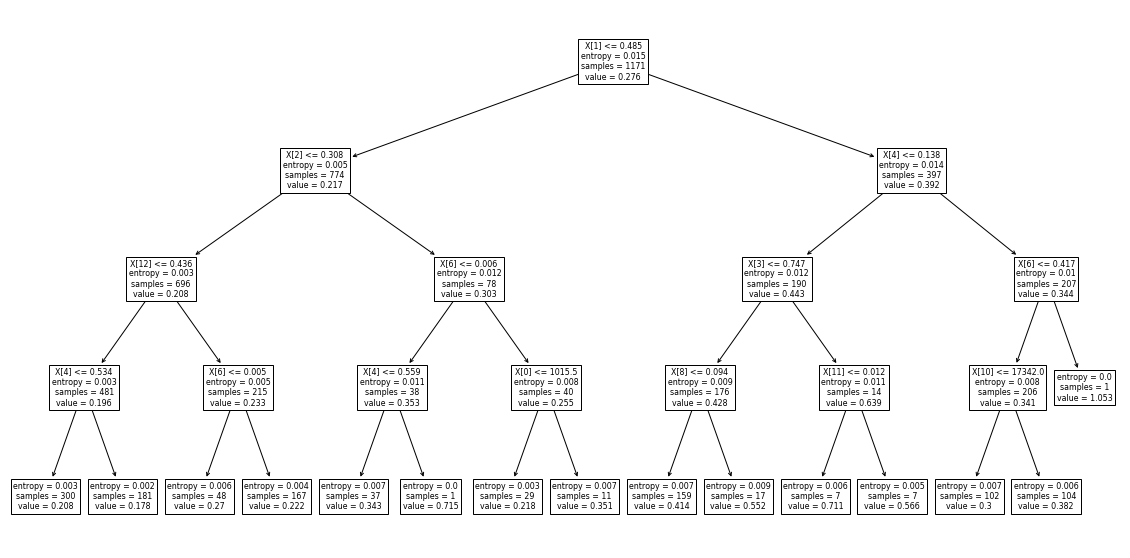

In [14]:
plt.subplots(figsize = (20,10))
gen_tree(df_pub, collegedatahelper.important_features_public)

## Private School Non-Profit

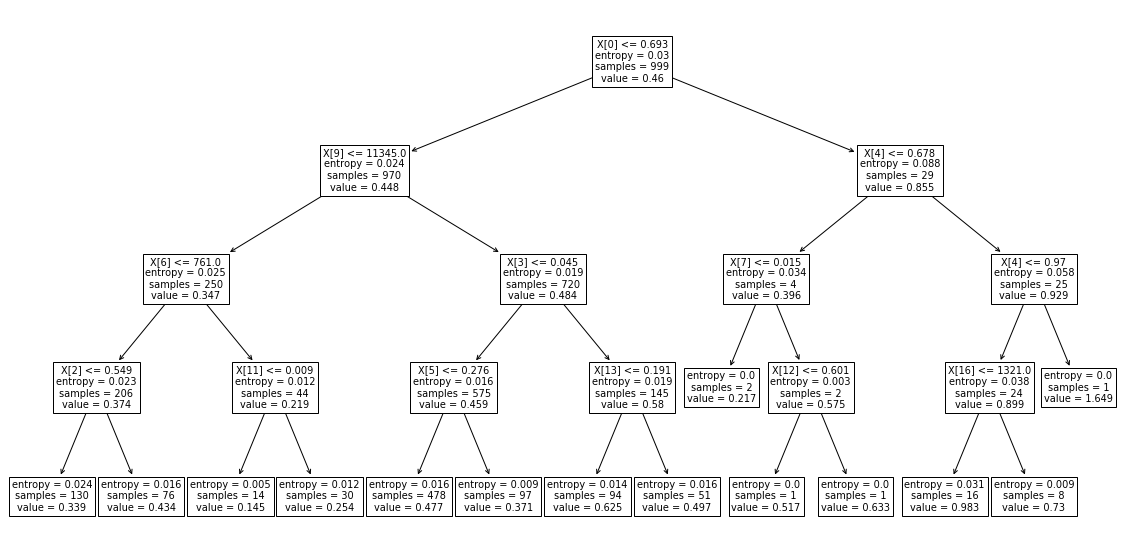

In [15]:
plt.subplots(figsize = (20,10))
gen_tree(df_priv, collegedatahelper.important_features_private)

## Private School For-Profit

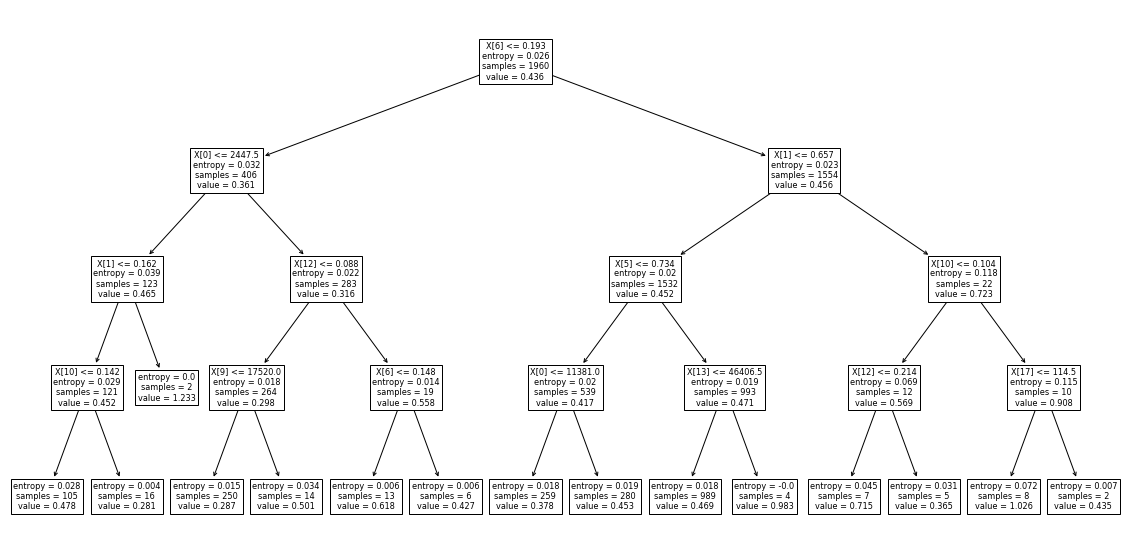

In [16]:
plt.subplots(figsize = (20,10))
gen_tree(df_priv_profit, collegedatahelper.important_features_private_profit)

In [18]:
# for all three dfs
for i in [df_pub, df_priv, df_priv_profit]:
    display(gen_tree(i))

TypeError: gen_tree() missing 1 required positional argument: 'feature_cols'

## Set up for Testing Functions

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr = DecisionTreeRegressor(max_depth = 4)
dtr = dtr.fit(X_train,Y_train)

In [ ]:
#copy of the code in names_decision_tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import os

def visualize_tree(decision_tree, feature_names, class_names=True, directory="./", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)

In [ ]:
from sklearn import tree
tree_output = tree.plot_tree(dtr)

## For testing Classifier Function

In [ ]:
#make the variable binary
from sklearn import metrics
from sklearn import cluster

frames = ['df_pub', 'df_priv', 'df_priv_profit']
for i, frame in enumerate([df_pub, df_priv, df_priv_profit]):
    debt2income_mat=frame[['CONTROL','debt_to_income']]#df_priv[['DEBT_MDN','MD_EARN_WNE_P10']]
    thisKMeans = cluster.KMeans(2) #12 clusters
    thisKMeans.fit(debt2income_mat)
    clusterDistances = thisKMeans.transform(debt2income_mat) #distances from each center
    frame['cluster'] = thisKMeans.predict(debt2income_mat)
    mean = (frame[frame['cluster']==0]['debt_to_income'].mean() + frame[frame['cluster']==1]['debt_to_income'].mean()) / 2 # CLUSTERS OF INDEBTEDNESS
    print(f'{frames[i]}: {mean}')
    print(f'{frames[i]} - max: {frame.debt_to_income.max()}')
    frame['higheravgdebt'] = (frame['debt_to_income'] > mean).astype(int)


In [ ]:
#define variable
X = df_pub[feature_cols]
Y1 = df_pub.higheravgdebt

In [ ]:
#split data
X_train, X_test, Y1_train, Y1_test = train_test_split(X, Y1, test_size=0.3, random_state=1)

In [ ]:
dtf = DecisionTreeClassifier()

dtf = dtf.fit(X_train,Y1_train)

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image

def visualize_tree(decision_tree, feature_names, class_names, directory="./", name="tree",proportion=True):
    # Export our decision tree to graphviz format
    dot_name = "%s/%s.dot" % (directory, name)
    dot_file = export_graphviz(decision_tree, out_file=dot_name,
                               feature_names=feature_names, class_names=class_names,proportion=proportion)
    # Call graphviz to make an image file from our decision tree
    image_name = "%s/%s.png" % (directory, name)
    os.system("dot -T png %s -o %s" % (dot_name, image_name))
    # Return the .png image so we can see it
    return Image(filename=image_name)



In [ ]:
visualize_tree(dtf,feature_cols,"higheravgdebt")

In [ ]:
#import classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y1_train)
columns=list(X_train.columns)
dot_data = export_graphviz(dtc,out_file=None,feature_names=columns,class_names=True)
graph = graphviz.Source(dot_data)
graph.render("image",view=True)
f = open("classifiers/classifier.txt","w+")
f.write(dot_data)
f.close()

In [ ]:
#from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#pip install pydotplus
#import pydotplus

#dot_data = StringIO()
#export_graphviz(dtf, out_file=dot_data,filled=True, rounded=True,
#                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('df_pub.png')
#Image(graph.create_png())

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz
from sklearn.datasets import make_regression

# Generate a simple dataset
X, y = make_regression(n_features=2, n_informative=2, random_state=0)
clf = DecisionTreeRegressor(random_state=0, max_depth=2)
clf.fit(X, y)
# Visualize the tree
from IPython.display import display
display(graphviz.Source(export_graphviz(clf)))

In [ ]:
#split df_pub data
#df_train_pub, df_test_pub = train_test_split(df_pub, test_size=0.2)

In [ ]:
print(df_train_pub.shape)
print(df_test_pub.shape)

In [ ]:
df_pub.hist(column='NPT4_PUB')

In [ ]:
df_priv.hist(column='NPT4_PRIV')

In [ ]:
df_priv_profit.hist(column='NPT4_PRIV')